In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

C:\Users\tcumi\github_repo\neural-network\python\layer.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.sum(w * X) + b


Checkpoint 100, Accuracy: 0.8580246913580247, Loss: 0.5744457951298466
Checkpoint 200, Accuracy: 0.8580246913580247, Loss: 0.5715342980844004
Checkpoint 300, Accuracy: 0.8580246913580247, Loss: 0.5712397893269857
Checkpoint 400, Accuracy: 0.8580246913580247, Loss: 0.5660466441401729
Checkpoint 500, Accuracy: 0.8580246913580247, Loss: 0.5648718939887153


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.74713   ]
 [0.15354586]
 [0.09932425]]
[0. 1. 0.] <-> [[0.47148255]
 [0.3247261 ]
 [0.20379142]]
[1. 0. 0.] <-> [[0.7322333 ]
 [0.16337636]
 [0.10439032]]
[0. 1. 0.] <-> [[0.90838325]
 [0.04680273]
 [0.04481405]]
[0. 1. 0.] <-> [[0.6403703 ]
 [0.22273082]
 [0.13689893]]
[0. 0. 1.] <-> [[0.2323507 ]
 [0.44384784]
 [0.3238014 ]]
[1. 0. 0.] <-> [[0.7689736 ]
 [0.13904665]
 [0.09197973]]
[1. 0. 0.] <-> [[0.9326576 ]
 [0.0323685 ]
 [0.03497393]]
[1. 0. 0.] <-> [[0.8418357 ]
 [0.09027066]
 [0.06789364]]
[1. 0. 0.] <-> [[0.33559105]
 [0.3975922 ]
 [0.26681674]]
[0. 1. 0.] <-> [[0.49287933]
 [0.31240427]
 [0.19471645]]
[1. 0. 0.] <-> [[0.4236835 ]
 [0.35150123]
 [0.22481534]]
[0. 1. 0.] <-> [[0.01626337]
 [0.39596102]
 [0.58777565]]
[1. 0. 0.] <-> [[0.9135106 ]
 [0.04364184]
 [0.04284757]]
[0. 1. 0.] <-> [[0.03726406]
 [0.4463216 ]
 [0.51641434]]
[1. 0. 0.] <-> [[0.5400332 ]
 [0.28458923]
 [0.17537752]]
[1. 0. 0.] <-> [[0.8732206 ]
 [0.06940816]
 [0.05737116]]
[1. 0. 0.] <->

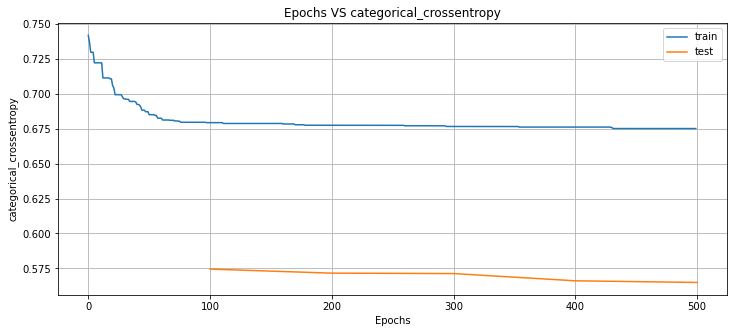

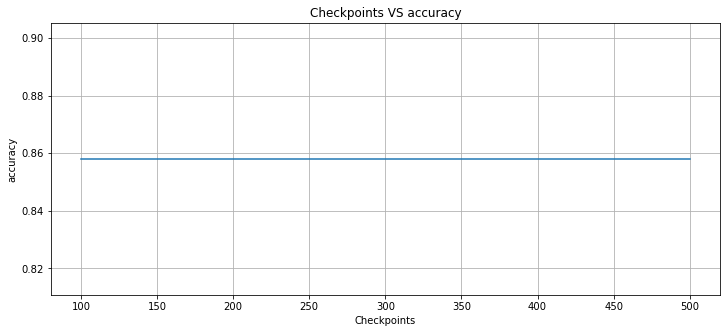

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 2.847500123381166, 'categorical_crossentropy': 0.5744457951298466, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'checkpoint': 100} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 2.8482430978162654, 'categorical_crossentropy': 0.5715342980844004, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'checkpoint': 200} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 2.819797039802081, 'categorical_crossentropy': 0.5712397893269857, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 13, 'tn_hit': 15, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 6, 'tn_hit': 87, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[-3.        ]
 [ 0.34669316]
 [-0.66970134]
 [ 1.1676457 ]
 [ 1.1943204 ]]
 bias: [1.8163124]

Neuron 1: weights:
[[-0.05367463]
 [ 0.9121371 ]
 [ 0.9079807 ]
 [-2.7190723 ]
 [ 1.1953853 ]]
 bias: [1.9455246]

Neuron 2: weights:
[[ 0.14945245]
 [-0.32247806]
 [-0.76904005]
 [ 0.48077756]
 [ 0.008275  ]]
 bias: [1.2308593]

Neuron 3: weights:
[[ 2.0064912 ]
 [-2.077064  ]
 [-1.7911831 ]
 [ 0.9240656 ]
 [-0.08448352]]
 bias: [-1.0076238]

$
Layer 2
Neuron 0: weights:
[[ 2.7589972]
 [-2.5490725]
 [ 1.051519 ]
 [-1.1891434]]
 bias: [-0.73491096]

Neuron 1: weights:
[[-1.7031994 ]
 [ 1.8172815 ]
 [-0.32852843]
 [-2.881755  ]]
 bias: [-0.45890605]

Neuron 2: weights:
[[-2.3220158]
 [ 2.5072255]
 [-2.5011709]
 [-1.1236135]]
 bias: [0.20661694]

$

